# Topic modeling

We are going to look at data from the [20 Newsgroups](http://qwone.com/~jason/20Newsgroups/) dataset.  These are postings to newsgroups in 20 different categories.

Scikit-learn has a function for downloading the data.  See: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html

## LDA

Latent Dirichlet Allocation:  a topic model that generates topics based on a set of documents' word frequencies.

* Get a "dictionary" that has IDs for all the words along with a record of their word frequencies.
* Use our "bag of words" to generate a list for each document containing its words and their frequencies
* Use gensim to generate an LDA model

## Gensim

* "Gensim is an open-source library for unsupervised topic modeling and natural language processing, using modern statistical machine learning."
* [gensim website](https://radimrehurek.com/gensim/)

In [1]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
data = fetch_20newsgroups(remove=("headers", "footers", "quotes"))

In [3]:
print(data.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

=================   ==========
Classes                     20
Samples total            18846
Dimensionality               1

In [4]:
x = data.data

In [5]:
len(x)

11314

In [6]:
x[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [7]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [8]:
data.target

array([7, 4, 4, ..., 3, 1, 8])

We use NLTK to pre-process the words.

In [9]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation

In [10]:
myStopWords = list(punctuation) + stopwords.words('english')

In [11]:
x[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [12]:
[w for w in word_tokenize(x[0].lower()) if w not in myStopWords]

['wondering',
 'anyone',
 'could',
 'enlighten',
 'car',
 'saw',
 'day',
 '2-door',
 'sports',
 'car',
 'looked',
 'late',
 '60s/',
 'early',
 '70s',
 'called',
 'bricklin',
 'doors',
 'really',
 'small',
 'addition',
 'front',
 'bumper',
 'separate',
 'rest',
 'body',
 'know',
 'anyone',
 'tellme',
 'model',
 'name',
 'engine',
 'specs',
 'years',
 'production',
 'car',
 'made',
 'history',
 'whatever',
 'info',
 'funky',
 'looking',
 'car',
 'please',
 'e-mail']

In [13]:
docs = []
for i in x:
    docs.append([w for w in word_tokenize(i.lower()) if w not in myStopWords])

In [14]:
docs[0]

['wondering',
 'anyone',
 'could',
 'enlighten',
 'car',
 'saw',
 'day',
 '2-door',
 'sports',
 'car',
 'looked',
 'late',
 '60s/',
 'early',
 '70s',
 'called',
 'bricklin',
 'doors',
 'really',
 'small',
 'addition',
 'front',
 'bumper',
 'separate',
 'rest',
 'body',
 'know',
 'anyone',
 'tellme',
 'model',
 'name',
 'engine',
 'specs',
 'years',
 'production',
 'car',
 'made',
 'history',
 'whatever',
 'info',
 'funky',
 'looking',
 'car',
 'please',
 'e-mail']

In [15]:
from nltk.stem.porter import PorterStemmer
#from nltk.stem import LancasterStemmer

In [16]:
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

In [17]:
docs_stemmed = []
for i in docs:
    docs_stemmed.append([p_stemmer.stem(w) for w in i])

In [18]:
docs_stemmed[0]

['wonder',
 'anyon',
 'could',
 'enlighten',
 'car',
 'saw',
 'day',
 '2-door',
 'sport',
 'car',
 'look',
 'late',
 '60s/',
 'earli',
 '70',
 'call',
 'bricklin',
 'door',
 'realli',
 'small',
 'addit',
 'front',
 'bumper',
 'separ',
 'rest',
 'bodi',
 'know',
 'anyon',
 'tellm',
 'model',
 'name',
 'engin',
 'spec',
 'year',
 'product',
 'car',
 'made',
 'histori',
 'whatev',
 'info',
 'funki',
 'look',
 'car',
 'pleas',
 'e-mail']

Here we use gensim to make the dictionary and corpus structures, and to employ the LDA model to extract groups (aka topics) and the distribution of words for each topic.

In [19]:
from gensim import corpora, models
import gensim

In [20]:
dictionary = corpora.Dictionary(docs_stemmed)

In [21]:
len(dictionary)

126516

In [22]:
dictionary.filter_extremes(no_below=10, no_above=0.5)
# could also trim with keep_n=1000 or similar to keep only the top words

In [23]:
len(dictionary)

7699

In [24]:
print(dictionary.token2id)

{'70': 0, 'addit': 1, 'anyon': 2, 'bodi': 3, 'bumper': 4, 'call': 5, 'car': 6, 'could': 7, 'day': 8, 'door': 9, 'e-mail': 10, 'earli': 11, 'engin': 12, 'enlighten': 13, 'front': 14, 'histori': 15, 'info': 16, 'know': 17, 'late': 18, 'look': 19, 'made': 20, 'model': 21, 'name': 22, 'pleas': 23, 'product': 24, 'realli': 25, 'rest': 26, 'saw': 27, 'separ': 28, 'small': 29, 'spec': 30, 'sport': 31, 'whatev': 32, 'wonder': 33, 'year': 34, '1.4': 35, '800': 36, 'adapt': 37, 'add': 38, 'answer': 39, 'attain': 40, 'base': 41, 'brave': 42, 'brief': 43, 'card': 44, 'clock': 45, 'cpu': 46, 'detail': 47, 'disk': 48, 'done': 49, 'especi': 50, 'experi': 51, 'fair': 52, 'floppi': 53, 'function': 54, 'heat': 55, 'hour': 56, 'knowledg': 57, 'messag': 58, "n't": 59, 'network': 60, 'next': 61, 'number': 62, 'oscil': 63, 'per': 64, 'poll': 65, 'procedur': 66, 'rate': 67, 'request': 68, 'send': 69, 'share': 70, 'si': 71, 'sink': 72, 'soul': 73, 'speed': 74, 'summar': 75, 'thank': 76, 'top': 77, 'two': 78, 

In [25]:
print(dictionary.token2id['patient'])

1668


In [26]:
dictionary[1668]

'patient'

In [27]:
corpus = [dictionary.doc2bow(text) for text in docs_stemmed]

In [28]:
print(corpus[30])

[(6, 1), (7, 1), (14, 1), (17, 1), (19, 1), (36, 1), (44, 1), (59, 2), (62, 3), (130, 1), (149, 2), (158, 1), (183, 1), (199, 1), (276, 3), (331, 2), (354, 1), (368, 1), (388, 2), (522, 1), (567, 1), (584, 1), (639, 1), (648, 2), (669, 1), (837, 3), (868, 1), (975, 2), (1033, 1), (1106, 1), (1225, 1), (1226, 1), (1227, 1), (1228, 1), (1229, 1), (1230, 1), (1231, 3), (1232, 1), (1233, 1), (1234, 1), (1235, 2), (1236, 1), (1237, 2), (1238, 3), (1239, 1), (1240, 2), (1241, 1), (1242, 1)]


In [29]:
dictionary[276]

'avail'

In [30]:
docs_stemmed[30]

['front',
 'cover',
 'avail',
 'soni',
 'check',
 'local',
 'car',
 'stereo',
 'shop',
 'probabl',
 'definit',
 'provid',
 'unit',
 'serial',
 'number',
 'hope',
 'regist',
 'warranti',
 'card',
 "n't",
 'know',
 'cost',
 'replac',
 'avail',
 'peopl',
 'damag',
 'face',
 'cover',
 'stand',
 'reason',
 'replac',
 'deter',
 'theft',
 'work',
 'stereo',
 'shop',
 'refer',
 'custom',
 'soni',
 '800',
 'number',
 'would',
 'sell',
 'face',
 'avail',
 'peopl',
 'came',
 'ask',
 'face',
 'cover',
 'pullout',
 'sleav',
 'matter',
 'would',
 'look',
 'dishearten',
 'find',
 'acquir',
 'deck',
 'could',
 "n't",
 'use',
 'theft',
 'occur',
 'deck',
 'notifi',
 'soni',
 'serial',
 'number',
 'catch',
 'theiv']

In [31]:
wordid = corpus[30][0]
print(dictionary[wordid[0]],wordid[1])

car 1


In [32]:
for i in corpus[30]:
    print(dictionary[i[0]], i[1])

car 1
could 1
front 1
know 1
look 1
800 1
card 1
n't 2
number 3
hope 1
peopl 2
probabl 1
use 1
check 1
avail 3
would 2
refer 1
work 1
shop 2
cost 1
occur 1
provid 1
ask 1
deck 2
reason 1
cover 3
find 1
theft 2
matter 1
definit 1
acquir 1
came 1
catch 1
custom 1
damag 1
deter 1
face 3
local 1
notifi 1
regist 1
replac 2
sell 1
serial 2
soni 3
stand 1
stereo 2
unit 1
warranti 1


In [33]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, 
                                           num_topics=20, 
                                           id2word = dictionary, 
                                           passes=5)

In [34]:
ldamodel.show_topics(num_topics=20)

[(0,
  '0.183*"x" + 0.026*"entri" + 0.019*"file" + 0.019*"``" + 0.017*"\'\'" + 0.014*"program" + 0.014*"section" + 0.013*"widget" + 0.012*"use" + 0.010*"applic"'),
 (1,
  '0.023*"game" + 0.021*"year" + 0.021*"\'s" + 0.020*"team" + 0.015*"player" + 0.012*"win" + 0.010*"play" + 0.010*"last" + 0.009*"run" + 0.009*"good"'),
 (2,
  '0.021*"use" + 0.016*"window" + 0.012*"file" + 0.010*"problem" + 0.009*"card" + 0.009*"n\'t" + 0.008*"run" + 0.008*"get" + 0.008*"work" + 0.008*"\'s"'),
 (3,
  '0.702*"\'ax" + 0.052*"max" + 0.018*"\'\'" + 0.016*"q" + 0.013*"q,3" + 0.011*"r" + 0.011*"7" + 0.009*"g" + 0.009*"b8f" + 0.009*"n"'),
 (4,
  '0.030*"\'\'" + 0.026*"``" + 0.010*"\'s" + 0.009*"one" + 0.008*"n\'t" + 0.008*"peopl" + 0.007*"would" + 0.005*"use" + 0.005*"think" + 0.005*"mani"'),
 (5,
  '0.023*"\'\'" + 0.020*"``" + 0.012*"\'s" + 0.012*"said" + 0.008*"one" + 0.007*"peopl" + 0.007*"us" + 0.006*"report" + 0.006*"children" + 0.006*"time"'),
 (6,
  '0.134*"\'\'" + 0.119*"``" + 0.057*"0" + 0.051*"1" + 

In [35]:
for i in ldamodel.print_topics(num_topics=20, num_words=20):
    print(i[0])
    print(i[1])
    print('\n')

0
0.183*"x" + 0.026*"entri" + 0.019*"file" + 0.019*"``" + 0.017*"''" + 0.014*"program" + 0.014*"section" + 0.013*"widget" + 0.012*"use" + 0.010*"applic" + 0.010*"c" + 0.009*"output" + 0.008*"motif" + 0.007*"rule" + 0.006*"line" + 0.006*"follow" + 0.006*"sourc" + 0.006*"0" + 0.006*"string" + 0.006*"includ"


1
0.023*"game" + 0.021*"year" + 0.021*"'s" + 0.020*"team" + 0.015*"player" + 0.012*"win" + 0.010*"play" + 0.010*"last" + 0.009*"run" + 0.009*"good" + 0.008*"n't" + 0.008*"season" + 0.007*"hit" + 0.007*"one" + 0.007*"fan" + 0.007*"score" + 0.006*"would" + 0.006*"pitch" + 0.006*"first" + 0.006*"defens"


2
0.021*"use" + 0.016*"window" + 0.012*"file" + 0.010*"problem" + 0.009*"card" + 0.009*"n't" + 0.008*"run" + 0.008*"get" + 0.008*"work" + 0.008*"'s" + 0.007*"thank" + 0.007*"one" + 0.007*"program" + 0.006*"like" + 0.006*"would" + 0.006*"driver" + 0.006*"know" + 0.006*"color" + 0.006*"set" + 0.006*"mac"


3
0.702*"'ax" + 0.052*"max" + 0.018*"''" + 0.016*"q" + 0.013*"q,3" + 0.011*"r" + 

In [36]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [37]:
import matplotlib.pyplot as plt
import re

In [38]:
re.split(re.escape(' + ') + '|' + re.escape('*'), 'hi + me*4')

['hi', 'me', '4']

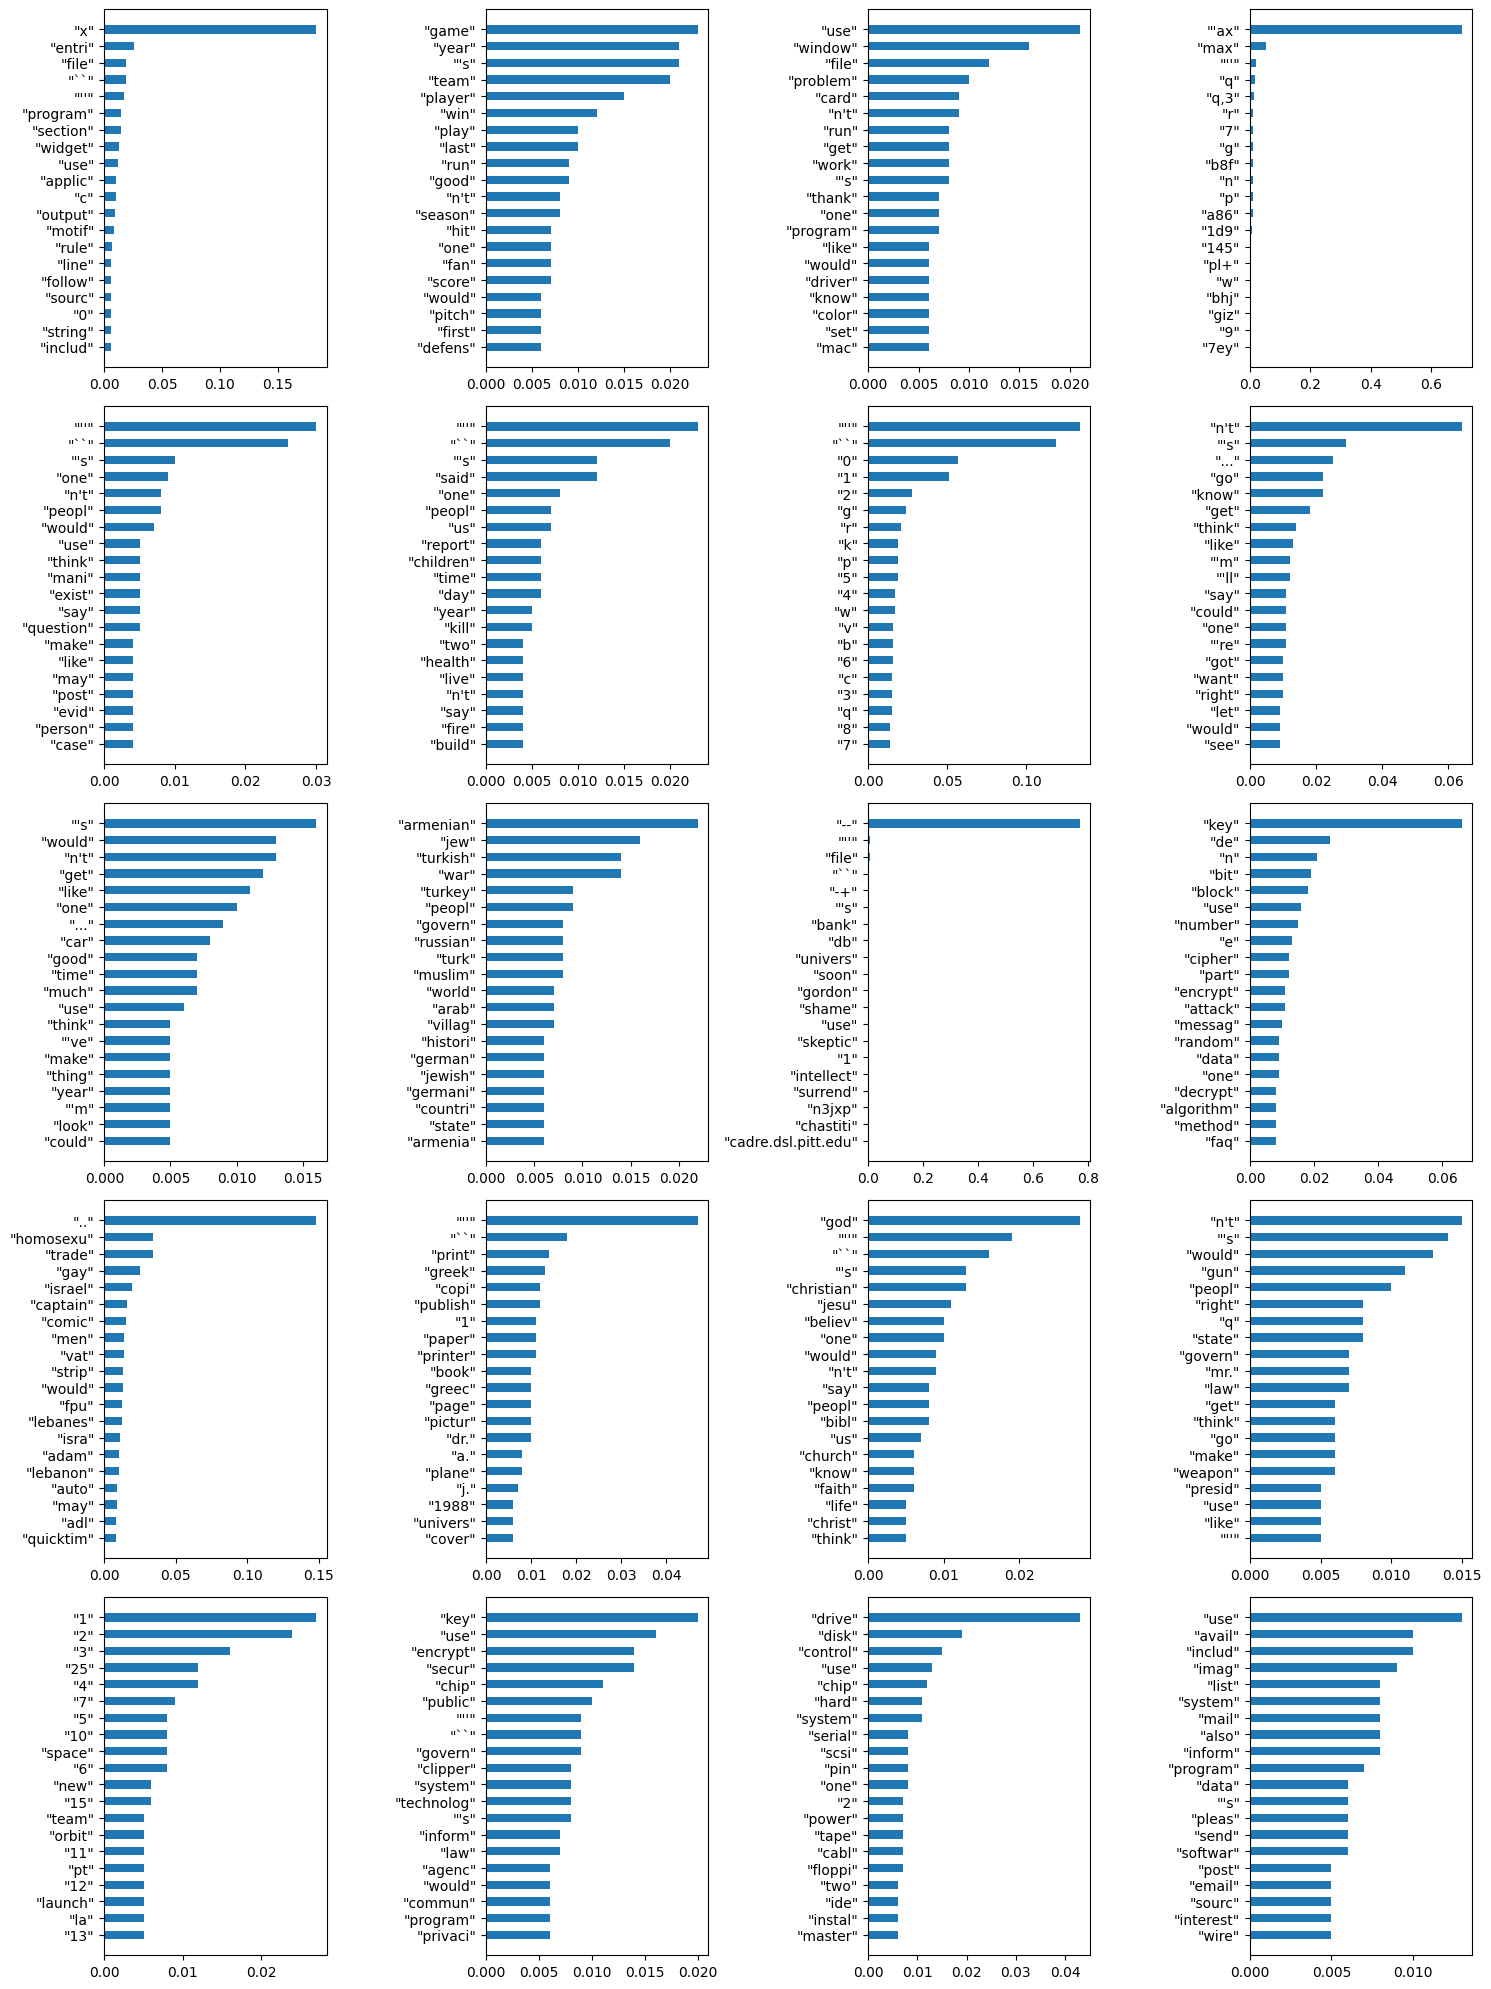

In [39]:
fig,ax = plt.subplots(5,4,figsize=(15,20))
ax = ax.flatten()
for i in ldamodel.print_topics(num_topics=20, num_words=20):
    x = []
    y = []
    count = 0
    for j in re.split(re.escape(' + ') + '|' + re.escape('*'), i[1]):
        if count % 2 == 0:
            y.insert(0,float(j))
        else:
            x.insert(0,j)
        count += 1
    ax[i[0]].barh(x,y,height=0.5)
plt.tight_layout()

# TF-IDF (Term Frequency Inverse Document Frequency)

TF-IDF is similar to bag-of-words, but it down weights words appearing frequently across lots of documents.

In [40]:
#Initialize the model
tfidf = gensim.models.TfidfModel(corpus)

In [41]:
corpus[30]

[(6, 1),
 (7, 1),
 (14, 1),
 (17, 1),
 (19, 1),
 (36, 1),
 (44, 1),
 (59, 2),
 (62, 3),
 (130, 1),
 (149, 2),
 (158, 1),
 (183, 1),
 (199, 1),
 (276, 3),
 (331, 2),
 (354, 1),
 (368, 1),
 (388, 2),
 (522, 1),
 (567, 1),
 (584, 1),
 (639, 1),
 (648, 2),
 (669, 1),
 (837, 3),
 (868, 1),
 (975, 2),
 (1033, 1),
 (1106, 1),
 (1225, 1),
 (1226, 1),
 (1227, 1),
 (1228, 1),
 (1229, 1),
 (1230, 1),
 (1231, 3),
 (1232, 1),
 (1233, 1),
 (1234, 1),
 (1235, 2),
 (1236, 1),
 (1237, 2),
 (1238, 3),
 (1239, 1),
 (1240, 2),
 (1241, 1),
 (1242, 1)]

In [42]:
# apply transformation
tfidf[corpus[30]]

[(6, 0.07518854414428354),
 (7, 0.04356435194754207),
 (14, 0.09273130294363027),
 (17, 0.03644084408981374),
 (19, 0.04726803658324321),
 (36, 0.11999137143136855),
 (44, 0.07356892386344115),
 (59, 0.04699817746248419),
 (62, 0.184507493958808),
 (130, 0.06924242299057674),
 (149, 0.08712870389508413),
 (158, 0.062264388057614806),
 (183, 0.031351709199972246),
 (199, 0.07568660855721576),
 (276, 0.20681116997979876),
 (331, 0.0589326704808312),
 (354, 0.07465242228223341),
 (368, 0.046250167968851834),
 (388, 0.23064321362213597),
 (522, 0.07851537120863389),
 (567, 0.09085343139585114),
 (584, 0.07141268383533707),
 (639, 0.061336443356290626),
 (648, 0.28149662796034103),
 (669, 0.05989177937436545),
 (837, 0.2586143920549429),
 (868, 0.056689979614736694),
 (975, 0.29785949521360056),
 (1033, 0.07773495146925867),
 (1106, 0.08667878152946035),
 (1225, 0.12621822657604612),
 (1226, 0.08015724681508288),
 (1227, 0.122362042789205),
 (1228, 0.1046112623170526),
 (1229, 0.10410900336

In [43]:
corpus_transformed = tfidf[corpus]

In [44]:
corpus_transformed[30]

[(6, 0.07518854414428354),
 (7, 0.04356435194754207),
 (14, 0.09273130294363027),
 (17, 0.03644084408981374),
 (19, 0.04726803658324321),
 (36, 0.11999137143136855),
 (44, 0.07356892386344115),
 (59, 0.04699817746248419),
 (62, 0.184507493958808),
 (130, 0.06924242299057674),
 (149, 0.08712870389508413),
 (158, 0.062264388057614806),
 (183, 0.031351709199972246),
 (199, 0.07568660855721576),
 (276, 0.20681116997979876),
 (331, 0.0589326704808312),
 (354, 0.07465242228223341),
 (368, 0.046250167968851834),
 (388, 0.23064321362213597),
 (522, 0.07851537120863389),
 (567, 0.09085343139585114),
 (584, 0.07141268383533707),
 (639, 0.061336443356290626),
 (648, 0.28149662796034103),
 (669, 0.05989177937436545),
 (837, 0.2586143920549429),
 (868, 0.056689979614736694),
 (975, 0.29785949521360056),
 (1033, 0.07773495146925867),
 (1106, 0.08667878152946035),
 (1225, 0.12621822657604612),
 (1226, 0.08015724681508288),
 (1227, 0.122362042789205),
 (1228, 0.1046112623170526),
 (1229, 0.10410900336

In [45]:
tfidf.num_docs

11314

In [46]:
ldamodel_tfidf = gensim.models.ldamodel.LdaModel(corpus_transformed, 
                                           num_topics=20, 
                                           id2word = dictionary, 
                                           passes=20)

In [47]:
for i in ldamodel_tfidf.print_topics(num_topics=20, num_words=20):
    print(i[0])
    print(i[1])
    print('\n')

0
0.032*"key" + 0.029*"encrypt" + 0.017*"chip" + 0.017*"clipper" + 0.014*"algorithm" + 0.013*"secur" + 0.013*"koresh" + 0.013*"escrow" + 0.013*"nsa" + 0.010*"phone" + 0.010*"detector" + 0.009*"batf" + 0.008*"crypto" + 0.008*"scheme" + 0.008*"fed" + 0.008*"radar" + 0.007*"privaci" + 0.007*"pgp" + 0.006*"telephon" + 0.006*"decrypt"


1
0.337*"--" + 0.007*"na" + 0.006*"dale" + 0.006*"surrend" + 0.005*"gordon" + 0.005*"skeptic" + 0.005*"gon" + 0.005*"bank" + 0.005*"lawyer" + 0.004*"geb" + 0.004*"intellect" + 0.004*"soon" + 0.004*"chastiti" + 0.004*"n3jxp" + 0.004*"cadre.dsl.pitt.edu" + 0.004*"humor" + 0.004*"chop" + 0.004*"shame" + 0.004*"meter" + 0.004*"palestin"


2
0.012*"pointer" + 0.010*"batteri" + 0.009*"gif" + 0.009*"modem" + 0.009*"amp" + 0.008*"output" + 0.008*"stereo" + 0.008*"vlb" + 0.008*"soni" + 0.008*"pd" + 0.007*"magazin" + 0.007*"card" + 0.007*"thanx" + 0.006*"signal" + 0.006*"linux" + 0.006*"xlib" + 0.006*"vertic" + 0.006*"compon" + 0.006*"speedstar" + 0.006*"nubu"


3
0.0

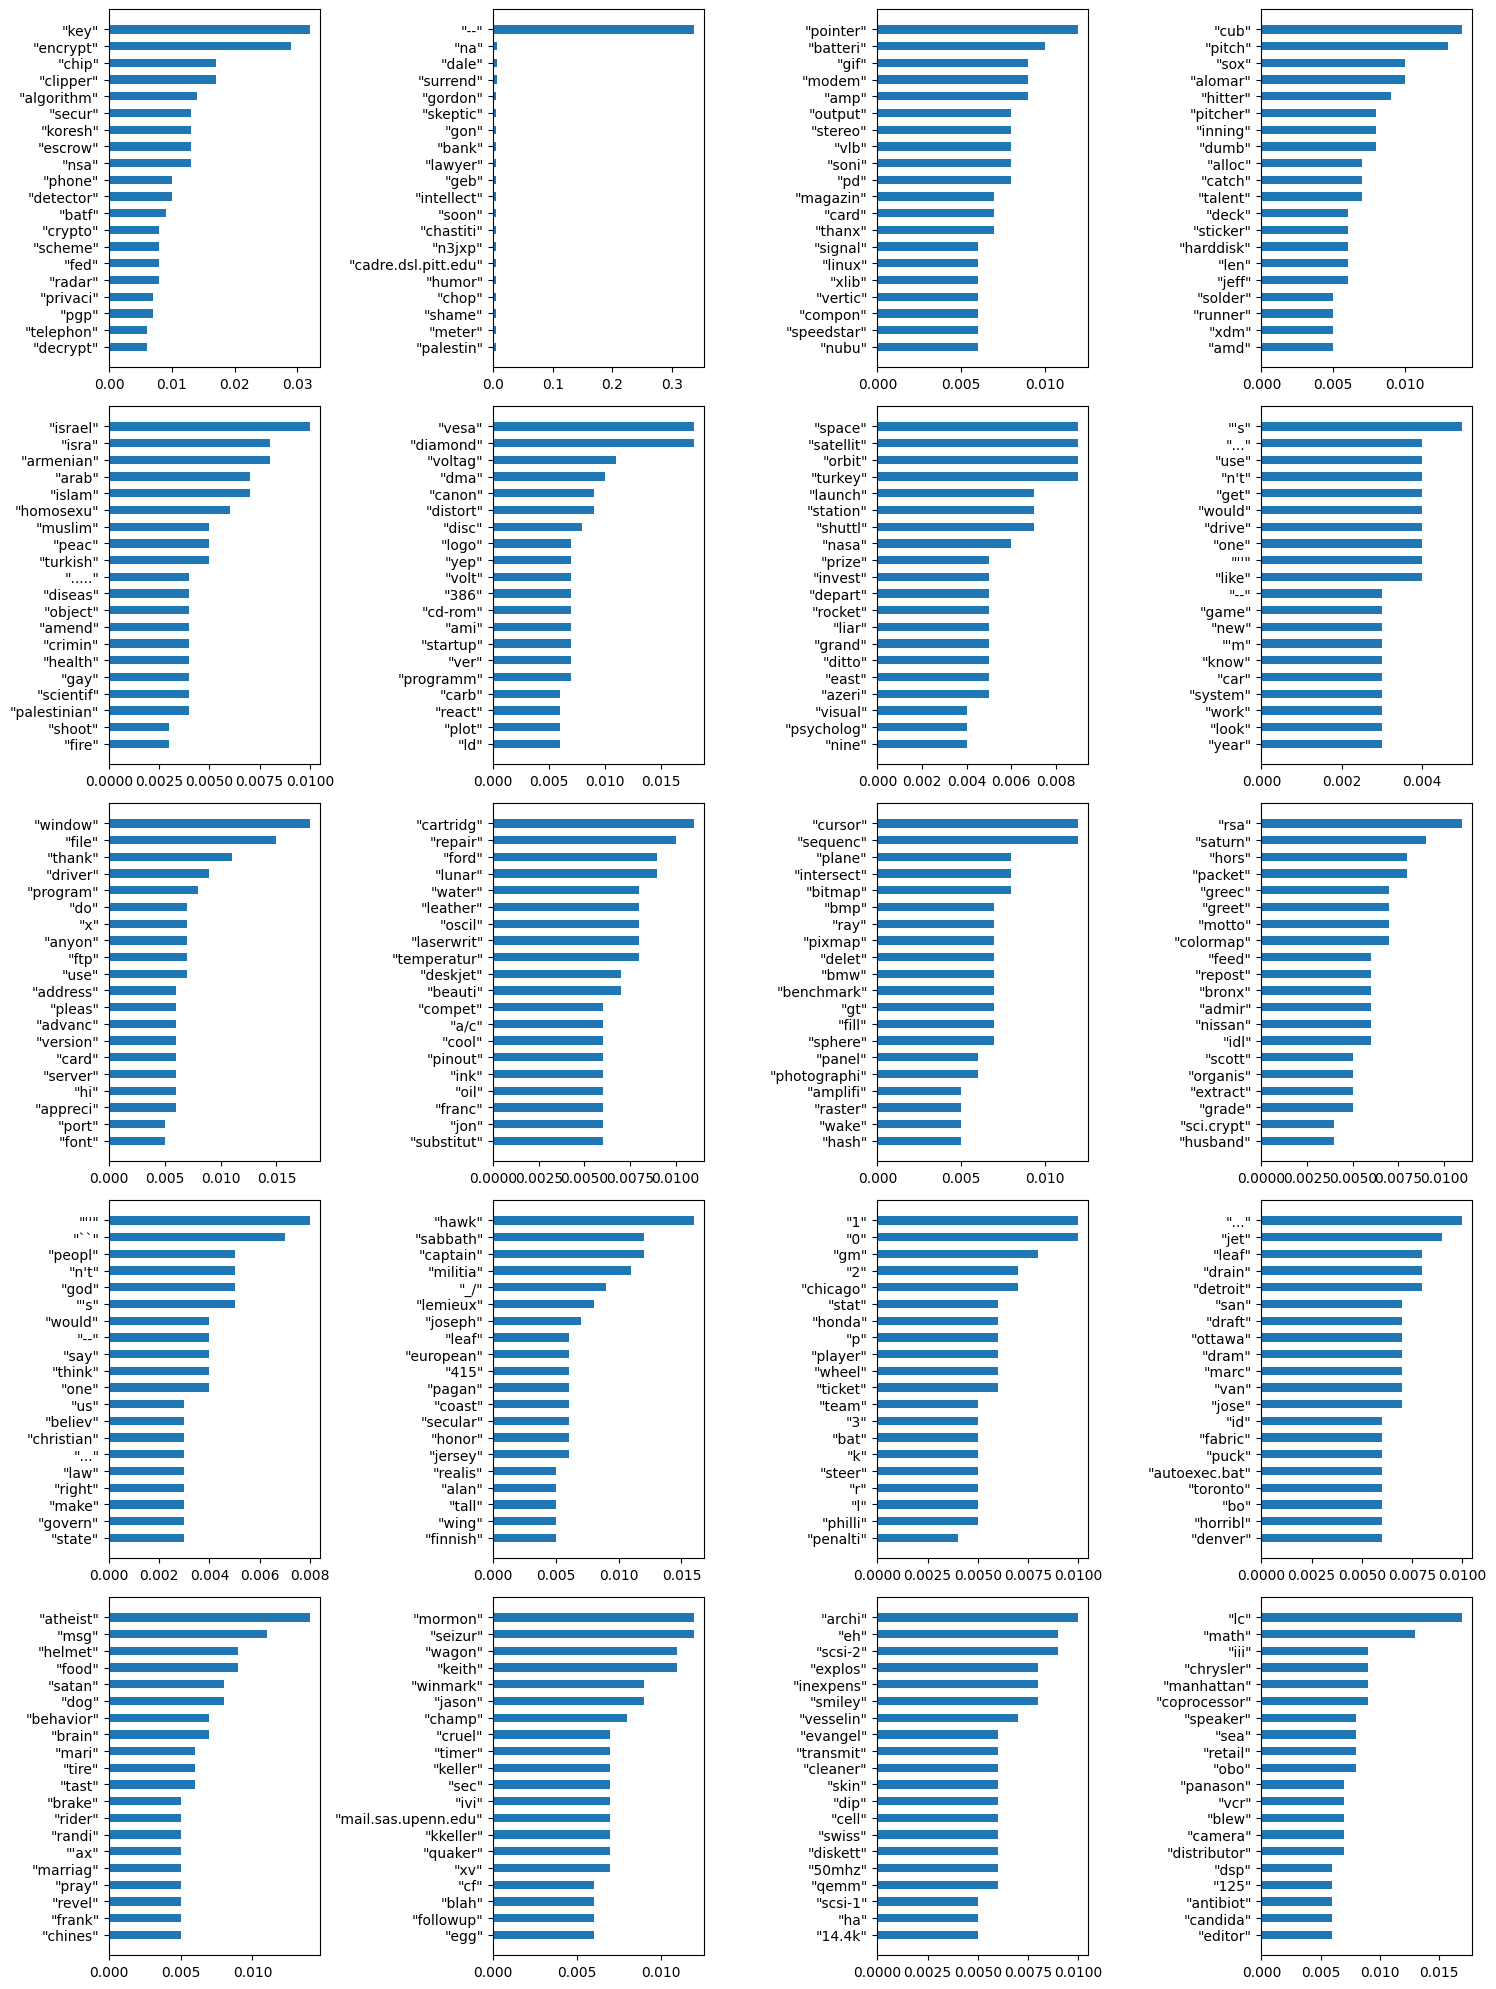

In [48]:
fig,ax = plt.subplots(5,4,figsize=(15,20))
ax = ax.flatten()
for i in ldamodel_tfidf.print_topics(num_topics=20, num_words=20):
    x = []
    y = []
    count = 0
    for j in re.split(re.escape(' + ') + '|' + re.escape('*'), i[1]):
        if count % 2 == 0:
            y.insert(0,float(j))
        else:
            x.insert(0,j)
        count += 1
    ax[i[0]].barh(x,y,height=0.5)
plt.tight_layout()